## Data Loading

In [30]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [21]:
df=pd.read_csv(r"C:\Users\gunja\Downloads\Ice_cream selling data.csv")

In [22]:
df.head(
)

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [23]:
df.shape

(49, 2)

## Data Preprocessing

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature (°C)         49 non-null     float64
 1   Ice Cream Sales (units)  49 non-null     float64
dtypes: float64(2)
memory usage: 912.0 bytes


In [25]:
df.isnull().sum()

Temperature (°C)           0
Ice Cream Sales (units)    0
dtype: int64

In [26]:
df.describe()

,Temperature (°C),Ice Cream Sales (units)
count,49.000000,49.000000
mean,0.271755,15.905308
std,2.697672,12.264682
min,-4.662263,0.328626
25%,-2.111870,4.857988
50%,0.688781,12.615181
75%,2.784836,25.142082
max,4.899032,41.842986


In [27]:
df.corr()

,Temperature (°C),Ice Cream Sales (units)
Temperature (°C),1.000000,-0.175184
Ice Cream Sales (units),-0.175184,1.000000


## EDA

<Axes: >

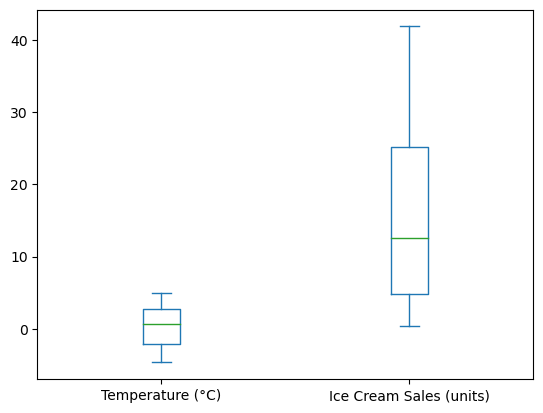

In [28]:
df.plot(kind='box')

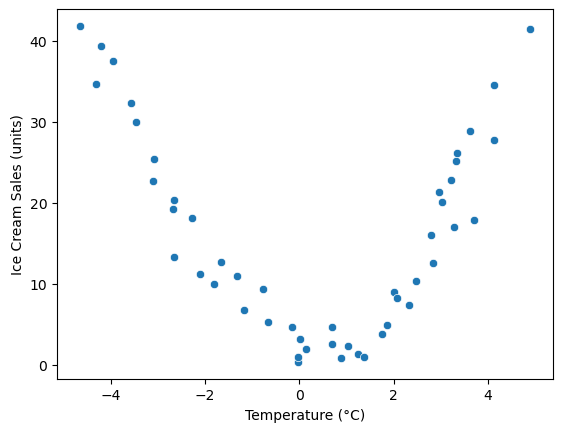

In [31]:
sns.scatterplot(x='Temperature (°C)', y='Ice Cream Sales (units)', data=df)
plt.show()

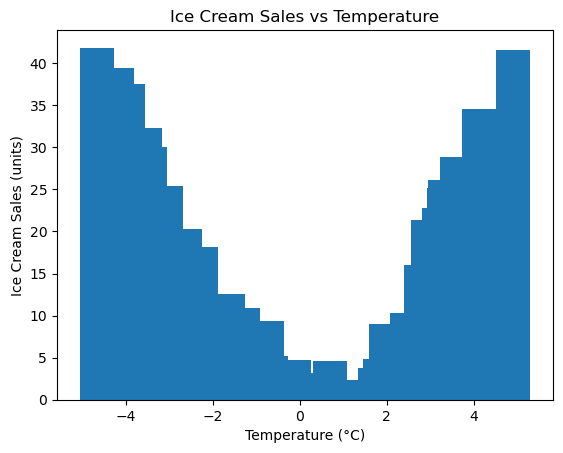

In [54]:

temperature = df['Temperature (°C)']
sales = df['Ice Cream Sales (units)']
plt.bar(temperature, sales)
plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sales (units)')
plt.title('Ice Cream Sales vs Temperature')


plt.show()

## Training Model

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
X = df[['Temperature (°C)']]
y = df['Ice Cream Sales (units)']

In [39]:
print("______________________________________________")
print(y.head())
print("______________________________________________")
print(X.head())

______________________________________________
0    41.842986
1    34.661120
2    39.383001
3    37.539845
4    32.284531
Name: Ice Cream Sales (units), dtype: float64
______________________________________________
   Temperature (°C)
0         -4.662263
1         -4.316559
2         -4.213985
3         -3.949661
4         -3.578554


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
X_train.head()

,Temperature (°C)
12,-2.111870
4,-3.578554
34,2.318591
8,-2.672461
3,-3.949661


## Model Building

In [44]:
# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [45]:
y_pred = model.predict(X_test)

In [47]:
print(y_pred)

[19.2247831  12.89218952 12.39975758 12.99914196 18.0259032  15.96490086
 16.13605851 16.34394177 15.0173946  17.3107825 ]


In [48]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

## Evaluations and Aaccuracy 

In [51]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 149.32629119325185
R-squared: -0.5751270190188227


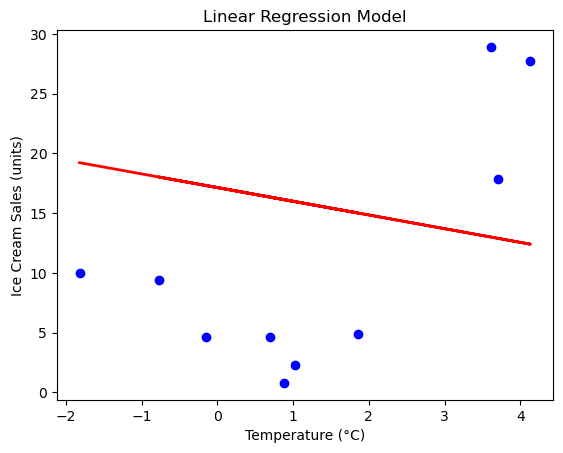

In [52]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sales (units)')
plt.title('Linear Regression Model')
plt.show()